<a href="https://colab.research.google.com/github/Chaotic-Legend/CMP-333-Codes/blob/main/Midterm%20Project%20Part%201%3A%20Home%20Prices%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Project Part 1: Analyzing Home Prices

The [Ames Housing Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) was introduced by Professor Dean De Cock in 2011 for use in data science education. It contains 2,919 observations of housing sales in Ames, Iowa, between 2006 and 2010. There are 79 features describing each house's size, quality, area, age, and other miscellaneous attributes.

From Kaggle:

>Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that many more influences price negotiations than the number of bedrooms or a white-picket fence.
#### CMP 333: Data Management and Analysis - Isaac D. Hoyos

## 1. Overall Understanding of the Data

- Load the dataset as a pandas DataFrame.
- Display key information of the data.
- Handle missing values.

1.1 In the cell below, import the `pandas` library and load the file `train.csv` from the Ames housing dataset as a DataFrame.

In [1]:
# 1.1 Import the pandas library and load the DataFrame.
import pandas as pd
from google.colab import files
import os

train = 'train.csv'

# Check if the CSV file already exists in the Colab environment.
if not os.path.exists(train):
    print(f"Please upload the \"train.csv\" file...\n")
    uploaded = files.upload()
else:
    print(f"Using the uploaded \"train.csv\" file.")

# Read the uploaded CSV file.
train_df = pd.read_csv(train)

Please upload the "train.csv" file...



Saving train.csv to train.csv


1.2 Display the first five rows of the DataFrame.

In [2]:
# 1.2 Display the first 5 rows of the dataset.
print("=== First 5 Rows of the train.csv DataFrame ===")
train_df.head()

=== First 5 Rows of the train.csv DataFrame ===


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


1.3 Display the shape of the DataFrame and list all column names.

In [3]:
# 1.3 Display the shape of the dataset and list all column names.
print("=== DataFrame Shape ===")
print(train_df.shape)

print("\n=== Column Names ===")
display(train_df.columns)

=== DataFrame Shape ===
(1460, 81)

=== Column Names ===


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

1.4 Display the number of missing values in each column.

In [4]:
# 1.4 Display the number of missing values in each column.
print("=== Number of Missing Values per Column ===")
missing_values = train_df.isnull().sum()
missing_df = missing_values[missing_values > 0].reset_index() # Only show columns with missing data.
missing_df.columns = ['Column Name', 'Missing Values']
display(missing_df)

=== Number of Missing Values per Column ===


,Column Name,Missing Values
0,LotFrontage,259
1,Alley,1369
2,MasVnrType,872
3,MasVnrArea,8
4,BsmtQual,37
5,BsmtCond,37
6,BsmtExposure,38
7,BsmtFinType1,37
8,BsmtFinType2,38
9,Electrical,1


1.5 Remove all the columns that contain missing values.

In [5]:
# 1.5 Remove all columns that contain missing values.
df_remove = train_df.dropna(axis=1)
print("=== Shape After Removing Columns With Missing Values ===")
print(df_remove.shape)
print("\n=== Columns Remaining After Removing Missing Values ===")
display(df_remove.columns)

=== Shape After Removing Columns With Missing Values ===
(1460, 62)

=== Columns Remaining After Removing Missing Values ===


Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

## 2. Study Key Features

The total number of features seems overwhelming, so let's start with a few features that we know are definitely relevant:
1. `OverallQual`: Overall material and finish quality
2. `YearBuilt`: Original construction date
3. `TotalBsmtSF`: Total basement area in square feet
4. `GrLivArea`: Above-ground living area in square feet

And don't forget `SalePrice`.

For each of these five features, we want to find:
- Descriptive statistics
- Graphical representation of their distribution
- Check for outliers
- Study correlations

2.1 **Descriptive statistics**: For each of the five features, find its minimum, maximum, mean, and standard deviation.

In [6]:
# 2.1 Descriptive Statistics:
import numpy as np

# Select relevant columns.
features = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
df_selected = train_df[features]

# Calculate descriptive statistics: minimum, maximum, mean, and standard deviation.
stats = pd.DataFrame({
    'Minimum': df_selected.min(),
    'Maximum': df_selected.max(),
    'Mean': df_selected.mean(),
    'Standard Deviation': df_selected.std()})

print("=== Descriptive Statistics for Key Features ===")
display(stats)

=== Descriptive Statistics for Key Features ===


,Minimum,Maximum,Mean,Standard Deviation
OverallQual,1,10,6.099315,1.382997
YearBuilt,1872,2010,1971.267808,30.202904
TotalBsmtSF,0,6110,1057.429452,438.705324
GrLivArea,334,5642,1515.463699,525.480383
SalePrice,34900,755000,180921.195890,79442.502883


2.2 **Distribution**: For each of the five features, generate a histogram. Choose the number of bins correctly.

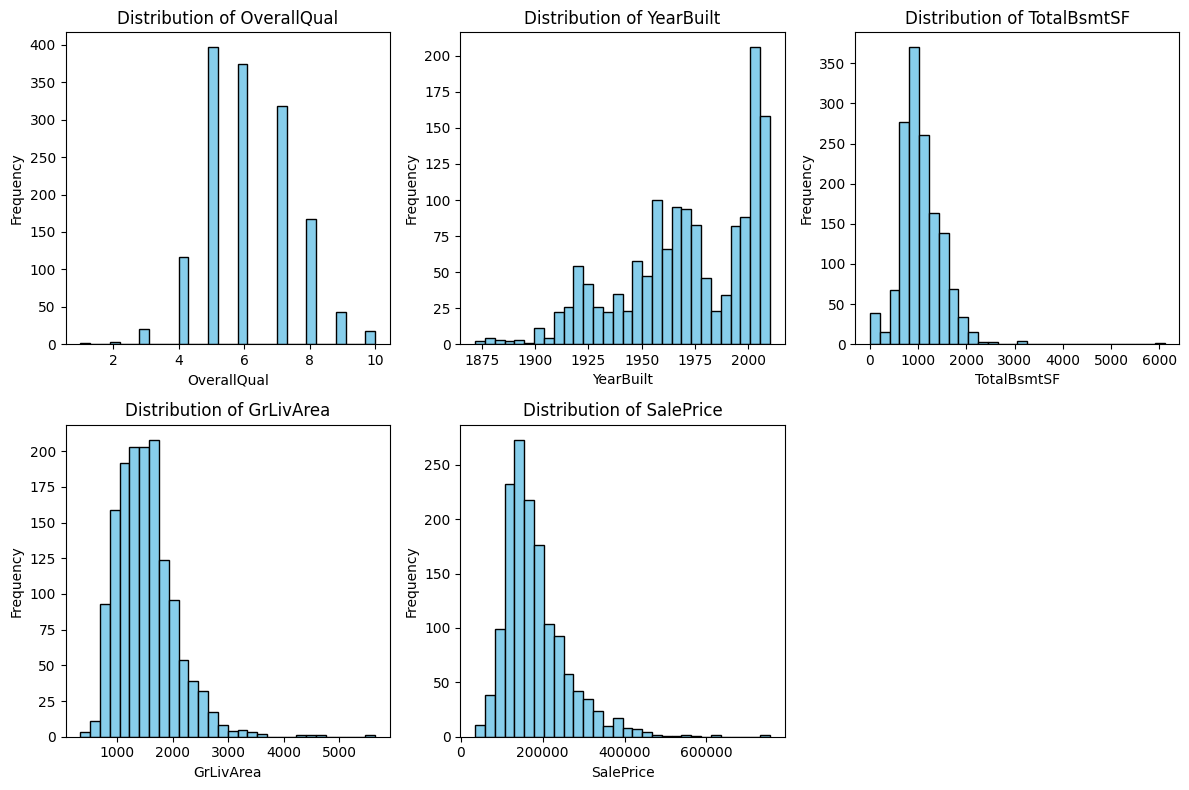

In [7]:
# 2.2 Distribution: Generate a histogram of each feature using Matplotlib.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    plt.hist(train_df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

2.3 **Outliers**: An **outlier** is a value that is located far away from the vast majority of the data. Remove those rows that contain outliers.

In [8]:
# 2.3 Outliers: Remove extreme values using the Interquartile Range (IQR) method.

# Create a copy for cleaning.
df_no_outliers = df_selected.copy()

# Remove outliers for each numeric feature.
for feature in ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']:
    Q1 = df_no_outliers[feature].quantile(0.25)
    Q3 = df_no_outliers[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[
        (df_no_outliers[feature] >= lower_bound) & (df_no_outliers[feature] <= upper_bound)
    ]

print("=== Shape Before Removing Outliers ===")
print(df_selected.shape)
print("\n=== Shape After Removing Outliers ===")
print(df_no_outliers.shape)

=== Shape Before Removing Outliers ===
(1460, 5)

=== Shape After Removing Outliers ===
(1310, 5)


2.4 **Correlation with sale price**: For each of the four chosen predictive features, draw a scatter plot of this feature and `SalePrice`. Set the title and axis label of the graph correctly.

=== Correlation With SalePrice ===


,Feature,Correlation with SalePrice
0,SalePrice,1.000000
1,OverallQual,0.776323
2,GrLivArea,0.677124
3,YearBuilt,0.603723
4,TotalBsmtSF,0.562018


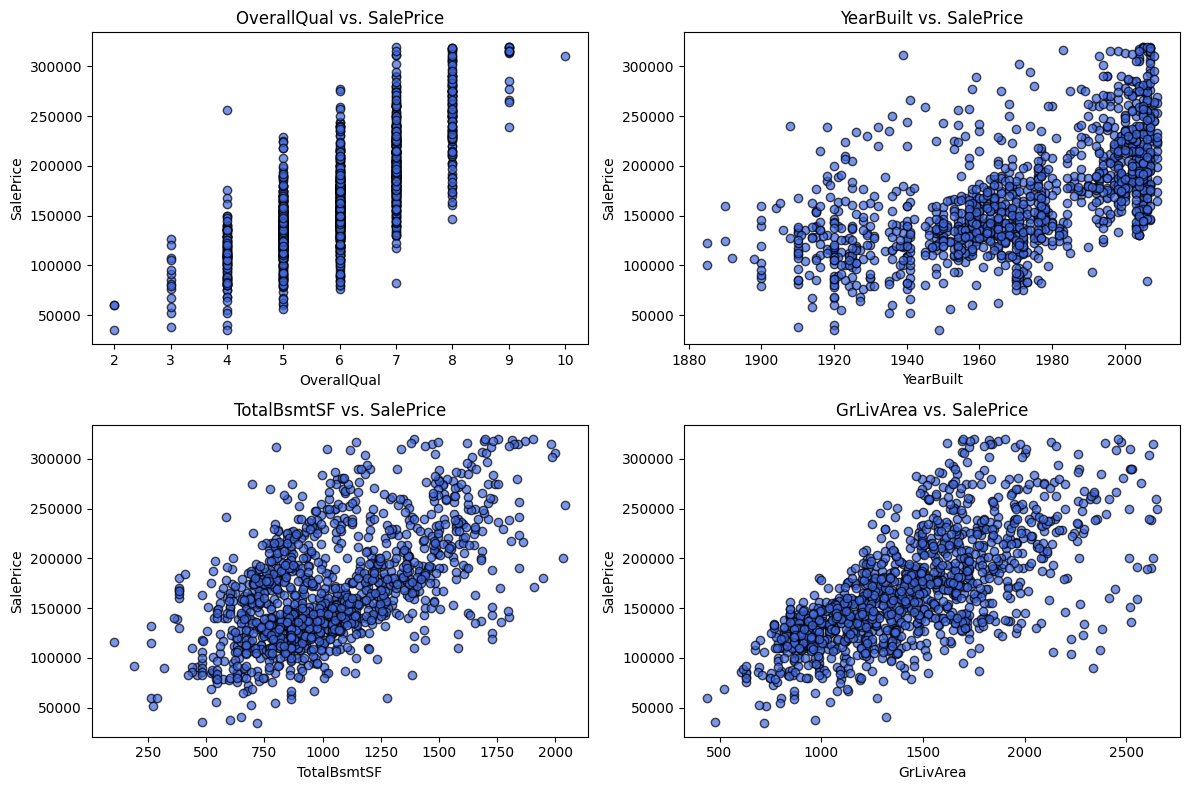

In [9]:
# 2.4 Correlation with SalePrice:

# Compute correlation values.
correlations = (
    df_no_outliers.corr(numeric_only=True)['SalePrice']
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'index': 'Feature', 'SalePrice': 'Correlation with SalePrice'}))

print("=== Correlation With SalePrice ===")
display(correlations)

# Scatter plots to visualize correlation.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
predictive_features = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']
for i, feature in enumerate(predictive_features):
    plt.subplot(2, 2, i + 1)
    plt.scatter(df_no_outliers[feature], df_no_outliers['SalePrice'], color='royalblue', edgecolor='black', alpha=0.7)
    plt.title(f"{feature} vs. SalePrice")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")

plt.tight_layout()
plt.show()

2.5 Describe the correlation between each predictive feature and `SalePrice`. Is there a positive correlation, a negative correlation, or no correlation?

The data analysis shows that all four features, **OverallQual**, **YearBuilt**, **TotalBsmtSF**, and **GrLivArea**, have a positive correlation with **SalePrice**. Among them, **OverallQual** and **GrLivArea** are the strongest predictors, meaning that higher-quality homes and those with more living space tend to sell for higher prices. **YearBuilt** and **TotalBsmtSF** also show moderate positive correlations, suggesting that newer homes and larger basements generally increase property value. Overall, the data in each scatter plot confirms that home quality, size, and age play significant roles in determining sale price.

## 3. Identify Additional Predictive Feature
Let's find out if other features are helpful for the price prediction. Additional features can be identified in the following ways:
- Calculate the correlation coefficient between `SalePrice` and an existing feature.
- Create new features from existing features.

3.1 Calculate the correlation coefficient of each feature with `SalePrice` (excluding `SalePrice` itself). Identify the feature (other than the four features studied in the previous section) that has the strongest correlation with the sale prices.

In [10]:
# 3.1 Correlation Analysis:
import pandas as pd

# Compute correlation of all numeric features with SalePrice.
correlations = (
    train_df.corr(numeric_only=True)['SalePrice']
    .drop('SalePrice')
    .sort_values(ascending=False))

correlation_df = correlations.reset_index()
correlation_df.columns = ['Feature', 'Correlation with SalePrice']

print("=== All Features Correlated With SalePrice ===")
display(correlation_df)

# Drop the 4 key features from Part 2 if present.
key_features = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']
remaining = correlations.drop(labels=[f for f in key_features if f in correlations.index])

# Identify and print the strongest remaining feature.
if not remaining.empty:
    strongest_feature = remaining.idxmax()
    print("\nStrongest Additional Predictive Feature:", strongest_feature)
else:
    strongest_feature = 'GarageCars'
    print("\nStrongest Additional Predictive Feature:", strongest_feature)

=== All Features Correlated With SalePrice ===


,Feature,Correlation with SalePrice
0,OverallQual,0.790982
1,GrLivArea,0.708624
2,GarageCars,0.640409
3,GarageArea,0.623431
4,TotalBsmtSF,0.613581
5,1stFlrSF,0.605852
6,FullBath,0.560664
7,TotRmsAbvGrd,0.533723
8,YearBuilt,0.522897
9,YearRemodAdd,0.507101



Strongest Additional Predictive Feature: GarageCars


3.2 **Feature Engineering**: Based on our experience, the total area of the house and the average area per room should also be significant factors in determining the price. Please create these two columns using the following formula:

1. total area = total area above ground ("GrLivArea") + total basement area ("TotalBsmtSF").
2. area per room = total area above ground ("GrLivArea") / number of rooms ("TotRmsAbvGrd").


In [11]:
# 3.2 Feature Engineering:

# Create new features for total area and average area per room.
train_df['TotalArea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
train_df['AreaPerRoom'] = train_df['GrLivArea'] / train_df['TotRmsAbvGrd']

print("=== New Columns of Engineered Features ===")

# Verify the new columns.
display(train_df[['GrLivArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'TotalArea', 'AreaPerRoom']].head())

=== New Columns of Engineered Features ===


,GrLivArea,TotalBsmtSF,TotRmsAbvGrd,TotalArea,AreaPerRoom
0,1710,856,8,2566,213.750000
1,1262,1262,6,2524,210.333333
2,1786,920,6,2706,297.666667
3,1717,756,7,2473,245.285714
4,2198,1145,9,3343,244.222222


3.3 Up to this point, you should have obtained 7 features that are helpful to predict the sale price: `OverallQual`, `YearBuilt`, `TotalBasmtSF`, `GrLivArea`, `TotalArea`, `AreaPerRoom`, and a feature selected in 3.1. Create a new DataFrame with `SalePrice` and these 7 features only. Save the data as a CSV file named `HousingData_processed.csv` on your computer.

In [12]:
from google.colab import files

# 3.3 Create a new DataFrame with all selected features:
selected_features = [
    'SalePrice',
    'OverallQual',
    'YearBuilt',
    'TotalBsmtSF',
    'GrLivArea',
    'TotalArea',
    'AreaPerRoom',
    strongest_feature
]
housing_data_processed = train_df[selected_features].copy()
print("=== First 5 Rows of the HousingData_processed.csv DataFrame ===")

# Display the first five rows of the new DataFrame.
display(housing_data_processed.head())

# Save the processed data to a new CSV file.
HousingData_processed = 'HousingData_processed.csv'
housing_data_processed.to_csv(HousingData_processed, index=False)
print(f"\n✅ File \"HousingData_processed.csv\" has been saved successfully!")

# Download the CSV file to the user's computer.
files.download(HousingData_processed)

=== First 5 Rows of the HousingData_processed.csv DataFrame ===


,SalePrice,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,TotalArea,AreaPerRoom,GarageCars
0,208500,7,2003,856,1710,2566,213.750000,2
1,181500,6,1976,1262,1262,2524,210.333333,2
2,223500,7,2001,920,1786,2706,297.666667,2
3,140000,7,1915,756,1717,2473,245.285714,3
4,250000,8,2000,1145,2198,3343,244.222222,3



✅ File "HousingData_processed.csv" has been saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>